In [1]:
%matplotlib inline

In [2]:
import os
import pandas as pd
import dotenv
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as sta

#environment variables
dotenv.load_dotenv('spinco.env')

#project variables
datapath= '\\'+os.environ['DATAPATH']
testInfo=pd.read_csv(datapath+'\Pacientes_COGNITION_codigos.csv')
patientInfo=pd.read_csv(datapath+'\Pacientes_COGNITION_testCognitivos.csv')

### some useful views of the data

In [3]:
patientInfo

,Codigo,Edad,Peso,Talla,IMC,Fecha_PSG,IAH,Chervin,Chervin_SAHS,BAS-II,PPVT-III,ENFEN - F1,ENFEN - F2,ENFEN - S1,ENFEN - S2,ENFEN - A,ENFEN - I
0,COG001,6.7,28.0,124.0,18.2,28/01/2020,28.4,18.0,1.0,87,100,6,3,4,1,2,5
1,COG002,7.3,31.0,130.0,18.3,04/02/2020,25.2,6.0,0.0,121,98,5,9,6,8,5,7
2,COG003,8.7,40.5,132.0,23.2,25/02/2020,3.0,15.0,1.0,87,103,7,3,3,7,6,7
3,COG004,8.1,36.0,138.0,18.9,26/02/2020,1.6,7.0,0.0,102,108,4,7,5,6,4,4
4,COG005,9.6,33.8,138.0,17.7,04/03/2020,6.6,5.0,0.0,55,89,1,5,7,5,2,6
5,COG006,7.6,28.0,125.0,17.9,05/03/2020,10.9,9.0,1.0,109,96,5,8,7,5,4,10
6,COG007,7.5,32.0,135.0,17.6,10/03/2020,3.0,15.0,1.0,95,101,3,6,3,1,3,7
7,COG008,6.4,17.0,113.0,13.3,11/03/2020,3.7,11.0,1.0,109,112,6,5,8,5,3,7
8,COG009,6.6,23.0,127.0,14.3,12/03/2020,27.4,15.0,1.0,98,107,5,5,6,1,5,7
9,COG010,9.8,55.5,146.0,26.0,23/06/2020,1.0,12.0,1.0,91,102,3,5,3,5,4,2


In [4]:
patientInfo.describe()

,Edad,Peso,Talla,IMC,IAH,Chervin,Chervin_SAHS,BAS-II,PPVT-III,ENFEN - F1,ENFEN - F2,ENFEN - S1,ENFEN - S2,ENFEN - A,ENFEN - I
count,19.000000,18.000000,18.000000,18.000000,19.000000,18.000000,18.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,7.768421,28.505556,128.111111,17.000000,7.931579,9.944444,0.611111,96.315789,104.052632,4.263158,5.368421,5.052632,3.789474,3.684211,6.157895
std,1.132378,9.430581,8.777571,3.610442,8.871117,4.331448,0.501631,20.412558,13.264295,1.758854,2.087277,1.899523,2.250406,1.565341,2.386610
min,6.400000,16.300000,110.000000,9.600000,1.000000,4.000000,0.000000,55.000000,76.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,7.000000,23.250000,124.250000,15.000000,2.900000,6.250000,0.000000,87.000000,99.000000,3.000000,4.500000,4.000000,1.500000,2.000000,4.500000
50%,7.500000,27.600000,129.000000,17.250000,4.000000,10.500000,1.000000,95.000000,105.000000,4.000000,5.000000,5.000000,4.000000,4.000000,7.000000
75%,8.200000,31.750000,132.000000,18.125000,8.100000,13.500000,1.000000,105.500000,110.000000,5.500000,6.500000,6.500000,5.000000,5.000000,7.000000
max,10.400000,55.500000,146.000000,26.000000,28.400000,18.000000,1.000000,137.000000,133.000000,7.000000,9.000000,8.000000,8.000000,6.000000,10.000000


In [5]:
testInfo

,Código,Descripcion
0,F1,Fluidez fonológica
1,F2,Fluidez semántica
2,S1,Sendero gris
3,S2,Sendero a color
4,A,Anillas
5,I,Interferencia


### load C3 channels in a dictionary

In [6]:
samplerate=500
signalpaths=os.listdir(datapath+'\\Archivos canales')
signalpaths=[a for a in signalpaths if a.endswith(".mat") ]
signalpaths=[datapath+'\\Archivos canales\\'+a for a in signalpaths]

In [7]:
signals=dict()

In [8]:
""" #this is not needed at this point but is the data structure I want to follow
#in the case of multiple channels each object would be a dictionary with the channel names
for i in range(len(signalpaths)):
    key=signalpaths[i][-19:-13]
    signals[key]=sio.loadmat(signalpaths[i])['C3_analogico'].flatten() """

" #this is not needed at this point but is the data structure I want to follow\n#in the case of multiple channels each object would be a dictionary with the channel names\nfor i in range(len(signalpaths)):\n    key=signalpaths[i][-19:-13]\n    signals[key]=sio.loadmat(signalpaths[i])['C3_analogico'].flatten() "

In [9]:
""" print(signals.keys()) """

' print(signals.keys()) '

In [10]:
""" timepoints=np.linspace(0,len(signals[key])/samplerate,len(signals[key]))
for signal in signals.values():
   plt.plot(timepoints,signal)
plt.legend(signals.keys(),loc='upper right')
plt.show() """

" timepoints=np.linspace(0,len(signals[key])/samplerate,len(signals[key]))\nfor signal in signals.values():\n   plt.plot(timepoints,signal)\nplt.legend(signals.keys(),loc='upper right')\nplt.show() "

### load spindles annotations
this is what we actually need

In [11]:
annopaths=os.listdir(datapath+'\\Labels')
annopaths=[a for a in annopaths if a.endswith(".csv") ]
annopaths=[datapath+'\\Labels\\'+a for a in annopaths]

In [12]:
annopaths

['\\\\10.0.106.125\\gib\\Usuarios\\Enrique\\DB Labeled COGNITION\\Labels\\COG001_spindle_c3.csv',
 '\\\\10.0.106.125\\gib\\Usuarios\\Enrique\\DB Labeled COGNITION\\Labels\\COG002_spindle_c3.csv',
 '\\\\10.0.106.125\\gib\\Usuarios\\Enrique\\DB Labeled COGNITION\\Labels\\COG003_spindle_c3.csv',
 '\\\\10.0.106.125\\gib\\Usuarios\\Enrique\\DB Labeled COGNITION\\Labels\\COG004_spindle_c3.csv',
 '\\\\10.0.106.125\\gib\\Usuarios\\Enrique\\DB Labeled COGNITION\\Labels\\COG005_spindle_c3.csv',
 '\\\\10.0.106.125\\gib\\Usuarios\\Enrique\\DB Labeled COGNITION\\Labels\\COG006_spindle_c3.csv',
 '\\\\10.0.106.125\\gib\\Usuarios\\Enrique\\DB Labeled COGNITION\\Labels\\COG007_spindle_c3.csv',
 '\\\\10.0.106.125\\gib\\Usuarios\\Enrique\\DB Labeled COGNITION\\Labels\\COG008_spindle_c3.csv',
 '\\\\10.0.106.125\\gib\\Usuarios\\Enrique\\DB Labeled COGNITION\\Labels\\COG009_spindle_c3.csv']

read one

In [13]:
annotations=pd.read_csv(annopaths[0])
annotations['Codigo']='COG001'

In [14]:
annotations

,Canal,Inicio,Fin,Duracion,Fase,Codigo
0,C3,1938.132297,1939.202326,1.070029,2,COG001
1,C3,2047.217898,2048.112834,0.894936,2,COG001
2,C3,2170.856032,2171.634237,0.778205,3,COG001
3,C3,2219.766538,2220.894943,1.128405,3,COG001
4,C3,2263.482492,2264.357974,0.875482,3,COG001
...,...,...,...,...,...,...
209,C3,36247.743185,36248.618671,0.875486,3,COG001
210,C3,36289.066139,36289.883251,0.817112,3,COG001
211,C3,36376.147851,36377.062241,0.914390,3,COG001
212,C3,36481.906609,36483.035009,1.128400,3,COG001


iterate over all

In [15]:
annotations=pd.DataFrame(columns=annotations.columns)
for i in range(len(annopaths)):
    aux=pd.read_csv(annopaths[i])
    aux['Codigo'] = 'COG00'+str(i+1)
    annotations=pd.concat([annotations,aux])

In [16]:
annotations.columns

Index(['Canal', 'Inicio', 'Fin', 'Duracion', 'Fase', 'Codigo'], dtype='object')

In [17]:
annotations.groupby('Codigo').Duracion.describe()

,count,mean,std,min,25%,50%,75%,max
Codigo,,,,,,,,
COG001,214.0,1.090127,0.293535,0.564196,0.914391,1.031127,1.206218,2.412450
COG002,240.0,1.075386,0.407359,0.525285,0.778205,0.992220,1.269453,2.684830
COG003,849.0,1.197951,0.372185,0.564196,0.914395,1.147861,1.420231,2.957205
COG004,419.0,1.089027,0.365776,0.505830,0.817117,1.011669,1.303499,2.879367
COG005,316.0,0.966787,0.325363,0.505831,0.739296,0.894938,1.128402,2.354084
COG006,226.0,0.846988,0.236961,0.505830,0.661475,0.797663,0.992216,1.906614
COG007,372.0,0.875535,0.252842,0.505830,0.695522,0.836571,1.031121,2.256809
COG008,47.0,0.788554,0.225206,0.486379,0.622564,0.758750,0.885208,1.575874
COG009,102.0,0.818261,0.248860,0.525289,0.646883,0.758752,0.904666,1.809328


In [18]:
annotations.groupby(['Codigo','Fase']).Duracion.describe()

count      mean       std       min       25%       50%  \
Codigo Fase                                                            
COG001 2     190.0  1.091334  0.287944  0.564196  0.933847  1.031127   
       3      24.0  1.080574  0.341343  0.583654  0.817117  1.021396   
COG002 1       1.0  0.719843       NaN  0.719843  0.719843  0.719843   
       2     136.0  1.174036  0.464630  0.525287  0.797662  1.089488   
       3     103.0  0.948582  0.269532  0.525285  0.739296  0.914399   
COG003 0       1.0  0.778209       NaN  0.778209  0.778209  0.778209   
       1       7.0  1.325735  0.381480  0.836572  1.099220  1.147856   
       2     786.0  1.210704  0.373036  0.564196  0.933847  1.167312   
       3      54.0  1.002663  0.303307  0.583654  0.778207  0.972758   
       4       1.0  1.245134       NaN  1.245134  1.245134  1.245134   
COG004 1       3.0  0.836575  0.146885  0.680931  0.768482  0.856034   
       2     387.0  1.094368  0.365331  0.505830  0.817117  1.011673   
       3      29.0  1.043873  0.382775  0.603108  0.817120  0.914390   
COG005 1       1.0  1.031124       NaN  1.031124  1.031124  1.031124   
       2     274.0  0.976594  0.324438  0.505831  0.744161  0.904666   
       3      41.0  0.899683  0.331477  0.525290  0.680928  0.778207   
COG006 1       8.0  0.921690  0.356915  0.525286  0.593383  0.904670   
       2     152.0  0.855643  0.239949  0.505830  0.680929  0.797664   
       3      66.0  0.818001  0.212559  0.505832  0.642019  0.797659   
COG007 1       4.0  0.943576  0.231563  0.680931  0.797661  0.943578   
       2     319.0  0.872799  0.247500  0.505830  0.700383  0.836570   
       3      49.0  0.887791  0.290439  0.505835  0.680938  0.856028   
COG008 1       4.0  0.904666  0.403590  0.564199  0.593380  0.817117   
       2      13.0  0.809634  0.271508  0.486379  0.622564  0.778205   
       3      30.0  0.763938  0.174383  0.525287  0.622564  0.700384   
COG009 0       2.0  1.313223  0.701598  0.817118  1.065171  1.313223   
       2       9.0  0.782529  0.192790  0.544741  0.661471  0.719843   
       3      91.0  0.810916  0.234737  0.525289  0.642019  0.758750   

                  75%       max  
Codigo Fase                      
COG001 2     1.206218  2.412450  
       3     1.186767  1.887158  
COG002 1     0.719843  0.719843  
       2     1.429958  2.684830  
       3     1.070039  1.731522  
COG003 0     0.778209  0.778209  
       1     1.614788  1.867698  
       2     1.434821  2.957205  
       3     1.167312  2.101172  
       4     1.245134  1.245134  
COG004 1     0.914397  0.972761  
       2     1.303500  2.879367  
       3     1.206224  2.431907  
COG005 1     1.031124  1.031124  
       2     1.147855  2.354084  
       3     1.070034  2.081713  
COG006 1     1.147856  1.420226  
       2     0.992215  1.906614  
       3     0.953301  1.459142  
COG007 1     1.089493  1.206217  
       2     0.992216  2.256809  
       3     1.031121  2.062259  
COG008 1     1.128403  1.420230  
       2     0.875483  1.575874  
       3     0.875479  1.147855  
COG009 0     1.561276  1.809328  
       2     0.836571  1.108950  
       3     0.894939  1.614783

In [19]:
aux=annotations
aux['count']=0
aux=aux.groupby(['Codigo','Fase']).count().reset_index()

In [20]:
aux

,Codigo,Fase,Canal,Inicio,Fin,Duracion,count
0,COG001,2,190,190,190,190,190
1,COG001,3,24,24,24,24,24
2,COG002,1,1,1,1,1,1
3,COG002,2,136,136,136,136,136
4,COG002,3,103,103,103,103,103
5,COG003,0,1,1,1,1,1
6,COG003,1,7,7,7,7,7
7,COG003,2,786,786,786,786,786
8,COG003,3,54,54,54,54,54
9,COG003,4,1,1,1,1,1


In [21]:
fig=px.bar(aux,x='Codigo',y='count',color='Fase',barmode='group')
fig.update_layout(title_text='#spindles for each patient, colored by sleep stage', title_x=0.5)
fig.show()

### correlations

In [30]:
aux=annotations
aux['spindleCount']=0
aux=aux.groupby(['Codigo']).count().reset_index().set_index('Codigo')
aux=aux[['spindleCount']]
aux

,spindleCount
Codigo,
COG001,214
COG002,240
COG003,849
COG004,419
COG005,316
COG006,226
COG007,372
COG008,47
COG009,102


In [32]:
merged=aux.join(patientInfo.set_index('Codigo'),on='Codigo')

In [42]:
merged

,spindleCount,Edad,Peso,Talla,IMC,Fecha_PSG,IAH,Chervin,Chervin_SAHS,BAS-II,PPVT-III,ENFEN - F1,ENFEN - F2,ENFEN - S1,ENFEN - S2,ENFEN - A,ENFEN - I
Codigo,,,,,,,,,,,,,,,,,
COG001,214,6.7,28.0,124.0,18.2,28/01/2020,28.4,18.0,1.0,87,100,6,3,4,1,2,5
COG002,240,7.3,31.0,130.0,18.3,04/02/2020,25.2,6.0,0.0,121,98,5,9,6,8,5,7
COG003,849,8.7,40.5,132.0,23.2,25/02/2020,3.0,15.0,1.0,87,103,7,3,3,7,6,7
COG004,419,8.1,36.0,138.0,18.9,26/02/2020,1.6,7.0,0.0,102,108,4,7,5,6,4,4
COG005,316,9.6,33.8,138.0,17.7,04/03/2020,6.6,5.0,0.0,55,89,1,5,7,5,2,6
COG006,226,7.6,28.0,125.0,17.9,05/03/2020,10.9,9.0,1.0,109,96,5,8,7,5,4,10
COG007,372,7.5,32.0,135.0,17.6,10/03/2020,3.0,15.0,1.0,95,101,3,6,3,1,3,7
COG008,47,6.4,17.0,113.0,13.3,11/03/2020,3.7,11.0,1.0,109,112,6,5,8,5,3,7
COG009,102,6.6,23.0,127.0,14.3,12/03/2020,27.4,15.0,1.0,98,107,5,5,6,1,5,7


In [33]:
r=merged.corr(method='spearman')

In [44]:
from scipy.stats import spearmanr
def spearmanr_pval(x,y):
        return spearmanr(x,y)[1]

def spearmanr_r(x,y):
        return spearmanr(x,y)[0]

r_scipy=merged.corr(method=spearmanr_r)

In [36]:
pval=merged.corr(method=spearmanr_pval)

In [37]:
pval

,spindleCount,Edad,Peso,Talla,IMC,IAH,Chervin,Chervin_SAHS,BAS-II,PPVT-III,ENFEN - F1,ENFEN - F2,ENFEN - S1,ENFEN - S2,ENFEN - A,ENFEN - I
spindleCount,1.000000,0.005266,0.000004,0.006788,0.029818,0.041242,0.630967,0.333899,0.363871,0.732368,0.507201,0.861802,0.067296,0.206349,0.480225,0.538609
Edad,0.005266,1.000000,0.001816,0.011909,0.099186,0.176760,0.235069,0.216838,0.201070,0.205386,0.297311,0.913423,0.540444,0.267920,0.913795,0.604372
Peso,0.000004,0.001816,1.000000,0.004564,0.021320,0.073778,0.521999,0.214669,0.237353,0.635383,0.512727,0.956481,0.107512,0.176755,0.598060,0.344864
Talla,0.006788,0.011909,0.004564,1.000000,0.306299,0.101727,0.213246,0.062465,0.313421,0.619806,0.038717,0.612148,0.353315,0.470241,0.878984,0.281713
IMC,0.029818,0.099186,0.021320,0.306299,1.000000,0.543967,0.794577,0.333899,0.813018,0.668231,0.582489,0.913423,0.148292,0.055246,0.277170,0.445610
IAH,0.041242,0.176760,0.073778,0.101727,0.543967,1.000000,0.567177,0.636808,0.905616,0.294990,0.565453,0.767499,0.523841,0.335818,0.735111,0.742114
Chervin,0.630967,0.235069,0.521999,0.213246,0.794577,0.567177,1.000000,0.005028,0.434204,0.347080,0.121596,0.072861,0.111740,0.089922,0.964885,0.886804
Chervin_SAHS,0.333899,0.216838,0.214669,0.062465,0.333899,0.636808,0.005028,1.000000,0.813781,0.475797,0.117258,0.205843,0.633892,0.111416,0.905596,0.170471
BAS-II,0.363871,0.201070,0.237353,0.313421,0.813018,0.905616,0.434204,0.813781,1.000000,0.557140,0.758096,0.020767,0.264133,0.333624,0.312586,0.222967
PPVT-III,0.732368,0.205386,0.635383,0.619806,0.668231,0.294990,0.347080,0.475797,0.557140,1.000000,0.332630,0.567119,0.795442,0.929780,0.494577,0.707689


Text(0.5, 1.0, 'Spearman Correlation')

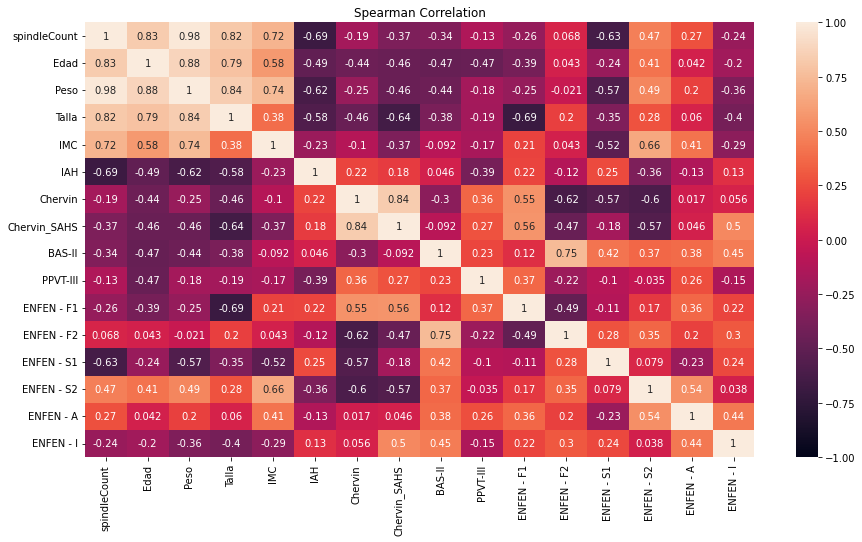

In [40]:
import seaborn as sns # For pairplots and heatmaps
plt.figure(figsize=(15,8))
heatmap = sns.heatmap(r, vmin=-1, vmax=1, annot=True)
plt.title("Spearman Correlation")

Text(0.5, 1.0, 'Spearman Correlation using scipy')

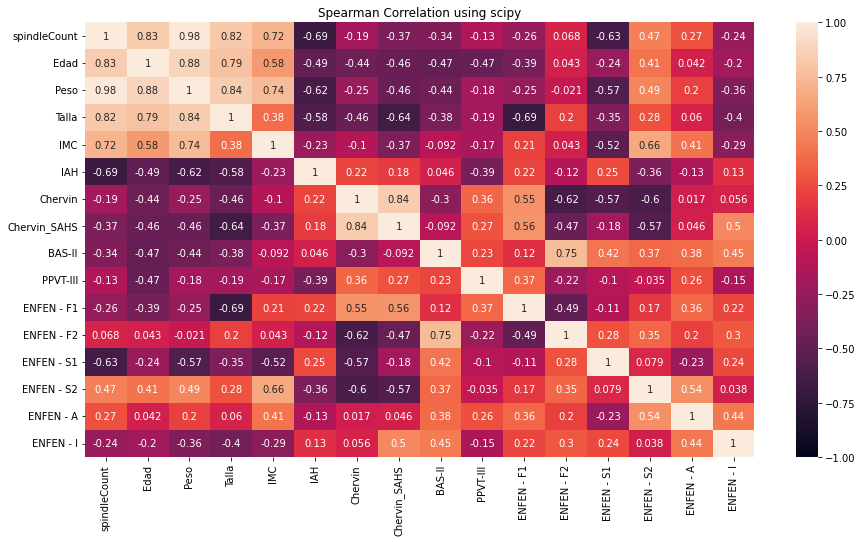

In [45]:
# double check
plt.figure(figsize=(15,8))
heatmap = sns.heatmap(r, vmin=-1, vmax=1, annot=True)
plt.title("Spearman Correlation using scipy")

Text(0.5, 1.0, 'Spearman Correlation p-values')

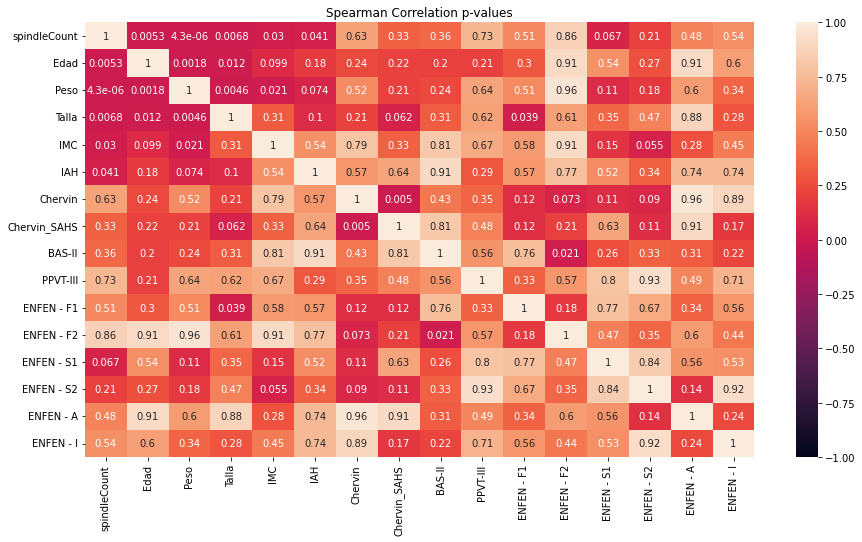

In [41]:
plt.figure(figsize=(15,8))
heatmap = sns.heatmap(pval, vmin=-1, vmax=1, annot=True)
plt.title("Spearman Correlation p-values")

In [65]:
merged['Codigo']=merged.index

In [66]:
#px.scatter(merged,x='Peso',y='spindleCount',trendline='lowess',trendline_options=dict(frac=0.8), trendline_color_override="green")
px.scatter(merged,x='Peso',y='spindleCount',text='Codigo')

Text(0.5, 1.0, 'Pearson Correlation')

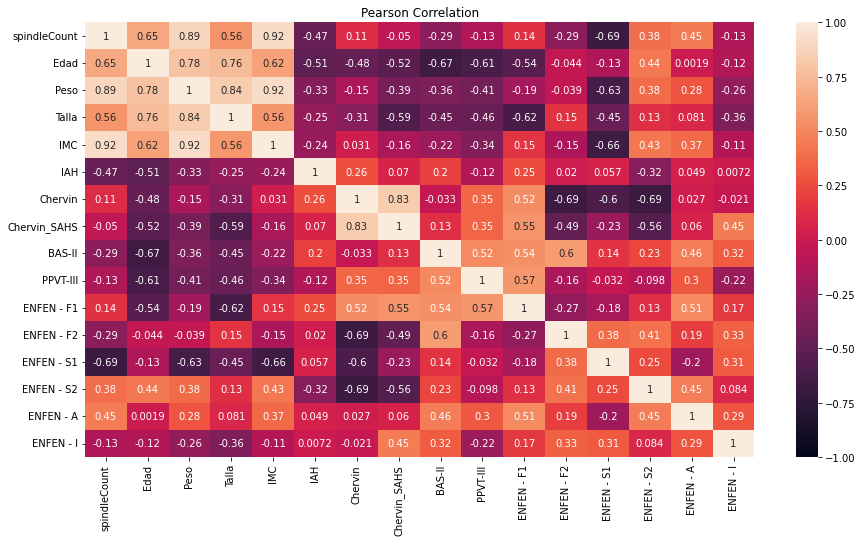

In [69]:
#tripple check, pearson's correlations should be even worse
r_pear=merged.corr(method='pearson')
plt.figure(figsize=(15,8))
heatmap = sns.heatmap(r_pear, vmin=-1, vmax=1, annot=True)
plt.title("Pearson Correlation")

Text(0.5, 1.0, 'Spearman Correlation using scipy')

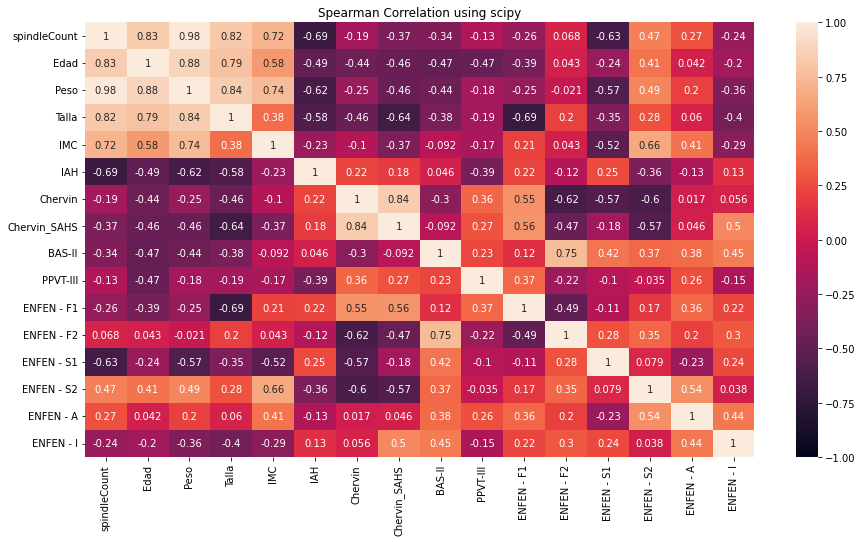

In [70]:
plt.figure(figsize=(15,8))
heatmap = sns.heatmap(r, vmin=-1, vmax=1, annot=True)
plt.title("Spearman Correlation using scipy")